In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

#@Author Keiser, Haider

# Data preperation
* renaming column names
* check for empty data and duplicates

Gibt es in eurem Datensatz Duplikate? Wenn ja, welche?
* Ja, es gibt insgesamt 109 Duplikate aus 4080 Datensätzen.
Gibt es Daten, die nicht relevant sind?
* Nein.
Überlegt euch eine Strategie wie ihr mit NAN-Werten umgeht. Probiert verschiedene
Methoden aus. Wie wirkt sich die Strategie auf euren Datensatz aus?

* Es befinden sich keine NAN-Werte im Datensatz.
Überlegt euch eine Strategie wie ihr mit Ausreißern umgeht. Wie könntet ihr Ausreißer in
eurem Datensatz behandeln? Wie viele % sind betroffen?
* Length: Es wurden keine Ausreißer identifiziert.
* Weight: 455 Einträge (etwa 11,15 %) wurden als Ausreißer erkannt. Diese Werte liegen oberhalb von 6,01 kg.
* W/L-Ratio: 17 Einträge (etwa 0,42 %) wurden als Ausreißer identifiziert. Diese Werte liegen oberhalb von 0,6.
Strategie zum Umgang mit Ausreißern**:
* Filter oder Entfernen: Ausreißer oberhalb der Schwellenwerte könnten entfernt werden,
* wenn sie als fehlerhaft oder untypisch für die Analyse gelten.
Ersetzen: 
* Alternativ können die Ausreißer durch den Median oder Mittelwert der jeweiligen Spalte ersetzt werden, um den Einfluss extremer Werte zu mindern.
Transformation:
 * Falls die Werte stark abweichen, könnten auch logarithmische oder robuste Transformationen helfen, die Verteilung anzupassen.


In [107]:
df = pd.read_csv("files\\fish_data.csv")
df.columns = ['species', 'length', 'weight', 'weight/length']

In [108]:
df.groupby(['species'])['weight'].mean()

species
Bronze croaker                   3.198355
Climbing perch                   3.271239
Gangetic whiting                 6.143143
Goldspotted grenadier anchovy    2.747711
Pama croaker                     3.849563
Paradise threadfin               3.989782
Rosy barb                        4.585453
Scaly hairfin anchovy            3.101750
Spanner barb                     2.632799
Name: weight, dtype: float64

In [109]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species_numeric'] = le.fit_transform(df['species'])  # Convert species to numeric value

In [110]:
df.duplicated().sum()

109

In [111]:
fish_ladder_avg = df.groupby(['species'])['weight'].max().sort_values()

top_10 = fish_ladder_avg.tail(10)

least_10 = fish_ladder_avg.head(10)

bottom_top = pd.concat([top_10, least_10])


C:\Users\Windows\AppData\Local\Temp\ipykernel_3376\2229327402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=least_10.index, palette='RdYlBu_r')


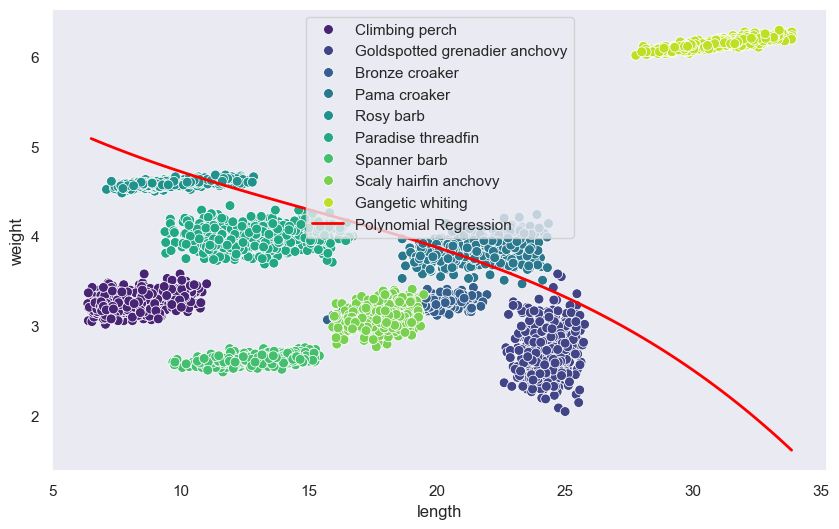

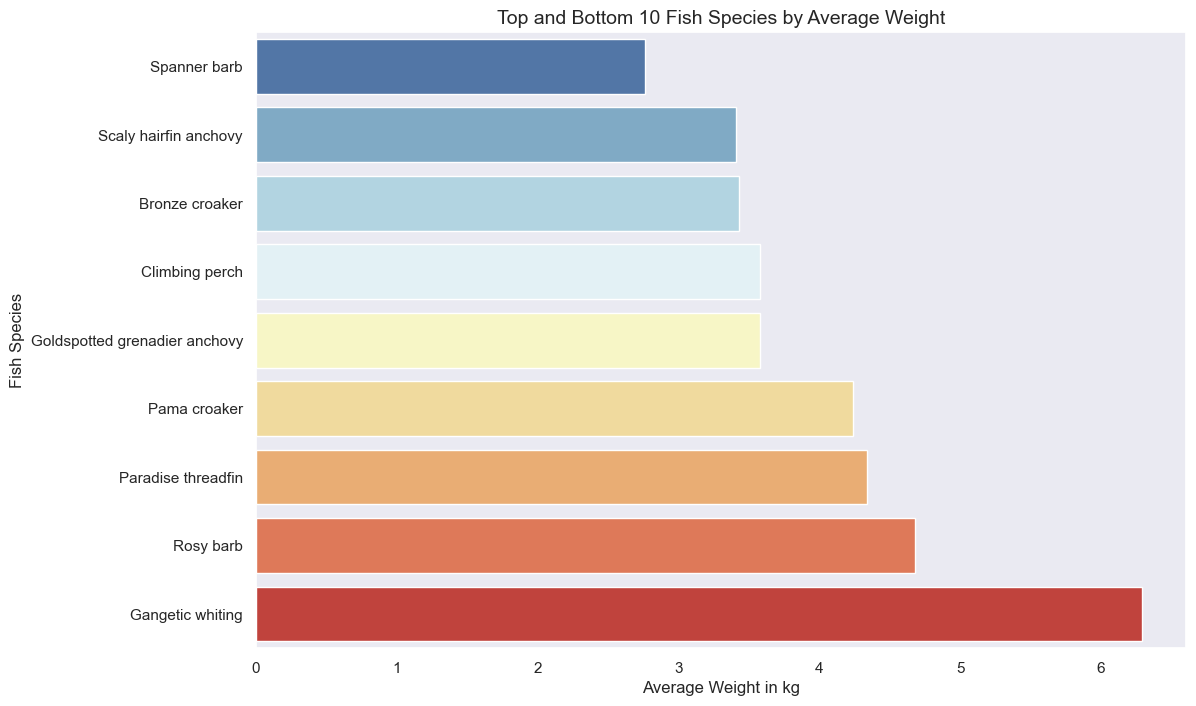

In [112]:

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10.values, y=least_10.index, palette='RdYlBu_r')

plt.title('Top and Bottom 10 Fish Species by Average Weight', fontsize=14)
plt.xlabel('Average Weight in kg', fontsize=12)
plt.ylabel('Fish Species', fontsize=12)
plt.show()


In [113]:
sns.distplot(df['length'])

C:\Users\Windows\AppData\Local\Temp\ipykernel_3376\2755753118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['length'])


<Axes: xlabel='length', ylabel='Density'>

In [114]:
array = np.array(df['weight'])
#array = np.array([df['weight'], df['length']])
array

array([3.45, 3.27, 3.46, ..., 6.25, 6.11, 6.14])

In [115]:
np.mean(array)

3.739875

In [116]:
np.sum(array)

15258.69

In [117]:
np.min(array)

2.05

In [118]:
np.max(array)

6.29

In [119]:
np.argmin(array) #Index of the minimum value


828

In [120]:
np.argmax(array)


4016

In [121]:
np.sort(array)[:3]

array([2.05, 2.09, 2.15])

In [122]:
np.sort(array)[-3:]


array([6.27, 6.27, 6.29])

# Data visualization

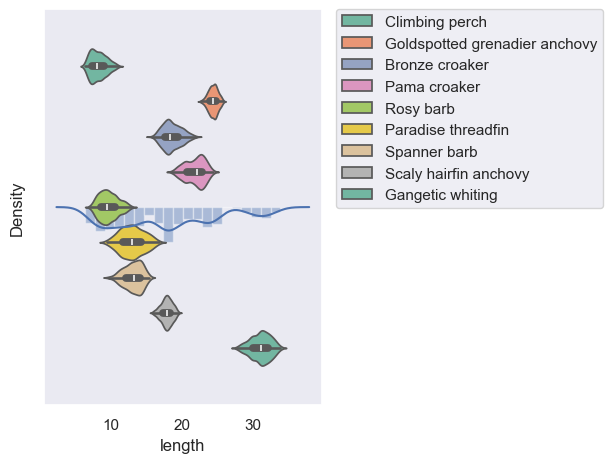

In [123]:
sns.violinplot( x='length', data=df, palette='Set2', legend=True,hue='species', gridsize=300)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Show the plot
plt.tight_layout()
plt.show()

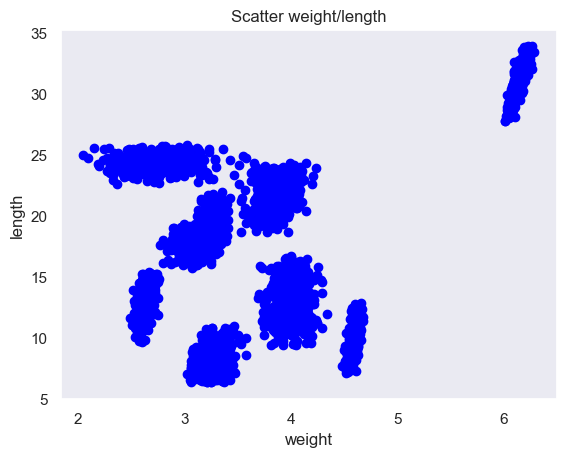

In [124]:
plt.scatter(x=df['weight'], y=df['length'], color="blue")
plt.xlabel('weight')
plt.ylabel('length')
plt.title('Scatter weight/length')
plt.show()

# Linear Regression

In [125]:
X = df[['length', 'weight']].values
y = df['species_numeric'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Evaluation
print('Accuracy: ', r2) # how accurate the test is, compared to the prediction = r2

Accuracy:  0.016172009438415236


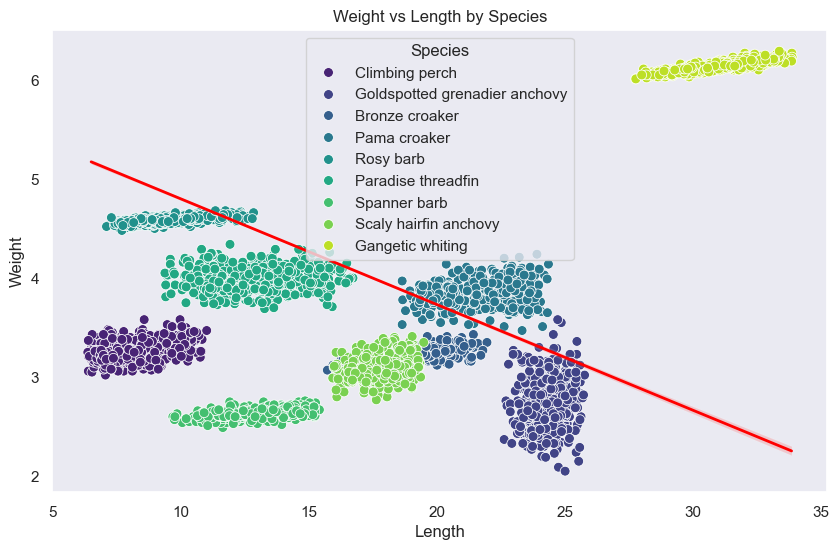

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="dark")
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(data=df, x='length', y='weight', hue='species', palette='viridis', s=50)

# Fit a smooth regression trendline (works well for non-linear relationships)
sns.regplot(x=X_test[:, 0], y=y_pred, scatter=False, color="red", line_kws={"linewidth": 2}) #line_kws

# Titles and labels
plt.title("Weight vs Length by Species")
plt.xlabel("Length")
plt.ylabel("Weight")

# Show legend
plt.legend(title='Species')
plt.show()


Length and weight by species

# Model Validation 
* length und weight sind vorhersagbar

Regression:
#### Welche numerische Werte in deinem Datensatz, die du mit einem Regression Modell vorhersagen kannst?
* Im Datensatz sind die numerischen Spalten „weight“ (Gewicht), „length“ (Länge) und
* „weight/length“ enthalten. Jedes dieser Attribute könnte potenziell als Zielvariable für
* eine Regression verwendet werden.

#### Welche Vorverarbeitungsschritte sind notwendig?
* Daten sortieren: Sortieren der Daten hilft in der Regel bei zeitlichen oder
* geordneten Abhängigkeiten. Bei einer Regression auf Basis einzelner Variablen
* könnte es jedoch vorrangig sein, Daten mit fehlenden Werten zu entfernen oder
* zu ergänzen, die Daten zu skalieren oder zu normalisieren, falls verschiedene Skalen vorkommen.

Feature Engineering:
* Das Erstellen neuer Variablen, wie z.B. quadratische oder
* logarithmische Transformationen der Länge oder des Gewichts, könnte die Modellleistung verbessern.

Train-Test-Split:
* Eine Unterteilung des Datensatzes in Trainings- und Testdaten
* ist wichtig, um das Modell auf unabhängigen Daten zu evaluieren.

Standardisierung/Normalisierung:
* Numerische Werte sollten standardisiert
* oder normalisiert werden, damit das Modell nicht durch die unterschiedlichen
* Größenordnungen beeinflusst wird.

#### Wie gut funktioniert das Modell? Erläutere was die einzelnen Werte aus der Confusion Matrix bedeuten.
* Bei einer Regression werden keine Confusion-Matrix-Werte erzeugt, da dies eine
* Klassifikationsmetrik ist. Stattdessen sind Metriken wie Mean Absolute Error (MAE),
* Mean Squared Error (MSE) oder R² (Bestimmtheitsmaß) geeigneter, um die
* Modellleistung zu bewerten. Diese Metriken geben Auskunft über die durchschnittliche
* Abweichung der Vorhersagen vom tatsächlichen Wert.

### Decision Tree:
##### Welche Klassen für die Vorhersagen gibt es in deinem Datensatz? Ist dein Datensatz ausgeglichen?
* Wenn der Datensatz zur Klassifikation verwendet wird, müssen diskrete Klassen
* vorhanden sein. Im aktuellen Datensatz sind jedoch nur kontinuierliche Werte
* wie Gewicht und Länge vorhanden.
    * Eine mögliche Klassenbildung könnte durch das Diskretisieren des Gewichts
    * oder des Verhältnisses von Gewicht zu Länge erfolgen, z.B. Einteilung in
    * Kategorien wie „leicht“, „mittel“, „schwer“ basierend auf Gewichtsklassen.
* Um zu prüfen, ob der Datensatz ausgeglichen ist, müssten wir die Häufigkeit jeder
* Klasse (z.B. Gewichts- oder Größenkategorien) betrachten. Ein unausgeglichener
* Datensatz könnte zu Verzerrungen im Entscheidungsbaum führen.

#### Welche Vorverarbeitungsschritte sind notwendig?
* Diskretisierung: Da die Werte wie Gewicht und Länge kontinuierlich sind, ist
* eine Diskretisierung notwendig, um sinnvolle Klassen zu erstellen.

Feature Scaling:
* Obwohl Entscheidungsbäume unempfindlich gegenüber
* Skalierungen sind, ist es trotzdem ratsam, Daten konsistent zu transformieren,
* um bessere Interpretationen und Visualisierungen zu ermöglichen.

Kategorisierung:
* Die Klasseneinteilung muss sinnvoll und auf den
* Anwendungsfall abgestimmt sein.

#### Wie gut funktioniert das Modell? Erläutere was die einzelnen Werte aus der Confusion Matrix bedeuten.

Für die Evaluierung eines Entscheidungsbaum-Modells wird eine Confusion Matrix
verwendet, die die tatsächlichen und vorhergesagten Klassen vergleicht. Sie zeigt:
* True Positives (TP): Anzahl der korrekt vorhergesagten positiven Klassen.
* True Negatives (TN): Anzahl der korrekt vorhergesagten negativen Klassen.
* False Positives (FP): Anzahl der fälschlicherweise als positiv vorhergesagten negativen Klassen.
* False Negatives (FN): Anzahl der fälschlicherweise als negativ vorhergesagten positiven Klassen.
Aus der Confusion Matrix lassen sich Metriken wie Genauigkeit (Accuracy), Präzision,
Recall und der F1-Score berechnen, um das Modell umfassend zu bewerten.

In [127]:
# Initialize the Decision Tree Classifier
features = ['length', 'weight']
X = df[features]
y = df['species']

dtree = DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(X, y)
tree.plot_tree(dtree, feature_names=features)

[Text(0.5909090909090909, 0.875, 'weight <= 4.41\ngini = 0.889\nsamples = 4080\nvalue = [468, 476, 455, 415, 435, 458, 475, 480, 418]'),
 Text(0.36363636363636365, 0.625, 'weight <= 3.52\ngini = 0.857\nsamples = 3150\nvalue = [468.0, 476.0, 0.0, 415.0, 435.0, 458.0, 0.0, 480.0\n418.0]'),
 Text(0.4772727272727273, 0.75, 'True  '),
 Text(0.18181818181818182, 0.375, 'length <= 15.565\ngini = 0.8\nsamples = 2255\nvalue = [468, 473, 0, 413, 3, 0, 0, 480, 418]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.498\nsamples = 891\nvalue = [0, 473, 0, 0, 0, 0, 0, 0, 418]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.667\nsamples = 1364\nvalue = [468.0, 0.0, 0.0, 413.0, 3.0, 0.0, 0.0, 480.0, 0.0]'),
 Text(0.5454545454545454, 0.375, 'length <= 17.68\ngini = 0.505\nsamples = 895\nvalue = [0.0, 3.0, 0.0, 2.0, 432.0, 458.0, 0.0, 0.0, 0.0]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.013\nsamples = 461\nvalue = [0, 3, 0, 0, 0, 458, 0, 0, 0]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.009\nsamples = 

# Decision Tree
* Length and weight by species

#### Welches Pre-Tuning ist für deinen Entscheidungsbaum/-wald sinnvoll? Womit würdestdu starten?
* Maximale Tiefe des Baums (max_depth): Begrenzen der Tiefe verhindert Overfitting.
* Startwerte: None (keine Begrenzung) oder Werte wie 3-10.
* Mindestanzahl von Datenpunkten in einem Blatt (min_samples_leaf):
    * Startwert: 1 oder 2. Höhere Werte fördern Generalisierung.
* Anzahl der Features für Splits (max_features): Testen von sqrt, log2 oder einer
* festen Anzahl.
* Kriterium (criterion): gini oder entropy (Entscheidungsbaum-Algorithmus).
* Für Random Forests: Anzahl der Bäume (n_estimators), Startwert: 100.
#### Wie gut funktioniert das Modell? Welchen Einfluss haben unterschiedliche Werte beim Pre-Tuning?
* Die Modellleistung wird üblicherweise durch Metriken wie Genauigkeit,
Precision, Recall oder F1-Score bewertet, abhängig von der Problemstellung.
* Mit den aktuellen Daten scheint es ein Klassifikationsproblem zu sein, basierend
auf den Merkmalen length, weight, und w_l_ratio.
* Ein einfacher Train-Test-Split kann initiale Performance-Ergebnisse liefern. Ein
Baseline-Test hilft einzuschätzen, wie weitreichend das Pre-Tuning das Modell
verbessern kann.
#### Hast du noch andere Parameter zum Optimieren von Decision Trees und Random Forest gefunden, die für ein gutes Ergebnis hilfreich sind?
* Kleine maximale Tiefe (max_depth): Kann zu einem unteranpassenden Modell
führen (Underfitting), insbesondere bei komplexeren Daten.
* Große maximale Tiefe: Kann zu Overfitting führen, wenn das Modell zu
spezifisch auf das Training reagiert.
* Hohe Werte bei min_samples_leaf: Fördern Generalisierung, verringern aber
die Auflösung des Modells.
* Random Forest n_estimators: Zu wenige Bäume liefern instabile Ergebnisse,
während zu viele Bäume Rechenzeit beanspruchen.
#### Was sind die Unterschiede zwischen den Modellen, die du trainiert hast?
* Entscheidungsbaum: Einzelner Baum, anfällig für Overfitting.
* Random Forest: Ensemble-Ansatz, der mehrere Bäume kombiniert. Stärker
gegen Overfitting, aber rechenintensiver.
#### Welche Features sind für dein Modell relevant (Feature Importance)? 
Was passiert, wenn du unwichtige Features weglässt? Hast du dieses Ergebnis erwartet?

* Random Forests bieten eine intuitive Methode, die Feature-Wichtigkeit zu
bewerten. Dies kann durch die Reduktion von Gini-Impurity oder durch
Permutation-Methoden erfolgen.

Was passiert, wenn unwichtige Features weggelassen werden?
* In der Regel steigt die Modellperformance, da redundante oder irrelevante
Daten vermieden werden.
* Die Ergebnisse hängen davon ab, ob ein Feature tatsächlich wenig
Information enthält oder ob es mit anderen stark korreliert ist

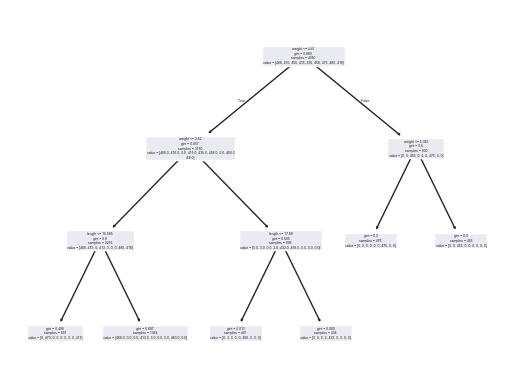

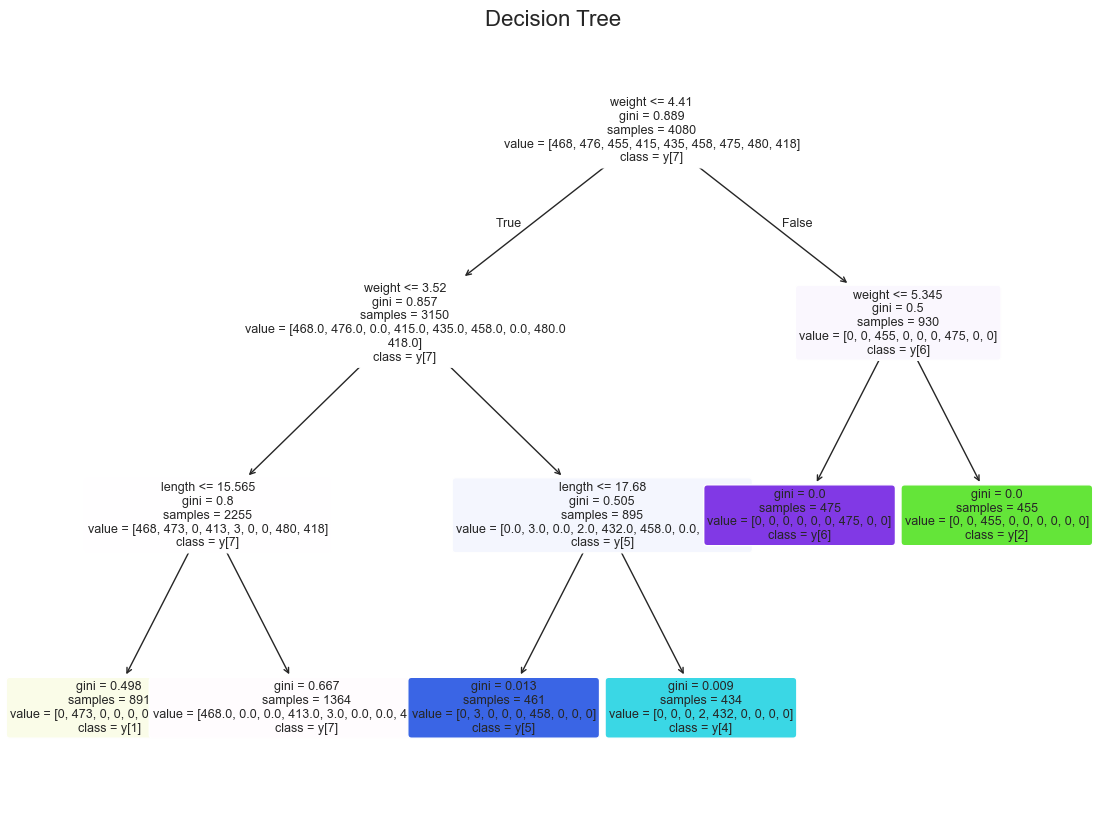

In [128]:
# Plot the decision tree
plt.figure(figsize=(14, 10))
plot_tree(dtree, feature_names=X.columns, class_names=True, filled=True, rounded=True, fontsize=9)
plt.title("Decision Tree", fontsize=16)
plt.show()
# gini = how mixed classes are
# sample = number of data points
# values = distribution of data points
# class lable based on the majority of samples

# Confusion Matrix

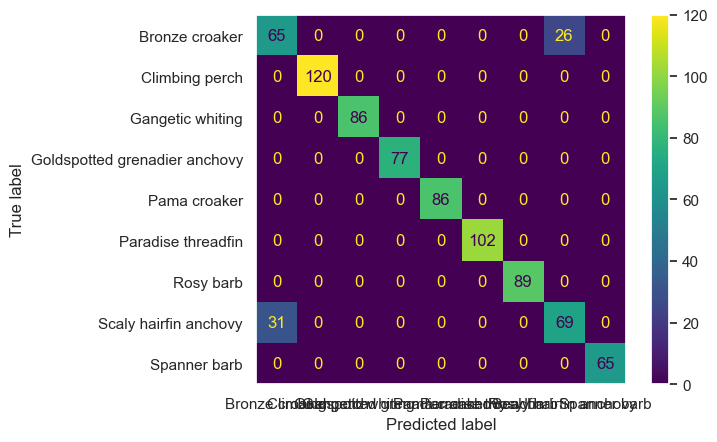

In [129]:
class_names = y
X = df[['length', 'weight']]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # reshape data accordingly here!

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# KNN-Classifier
* Precision of each species
* Recall = fewer FN (false Negatives)
* Support = Number of true instances

#### Wie schauen deine Daten nach der Skalierung aus?
* Sie wurden nach auf die Klassen aufgeteilt, wobei der Bronze Croaker und der Scaly hairfin anchovy oft nicht genau klassifiziert werden können (da das Gewicht ähnlich ist)
#### Welchen K Wert würdest du zum Starten auswählen?
* Ich würde mit 9 Starten, da es 9 verschiedene Klassen gibt
#### Wie sieht das Ergebnis deines Modelles aus? Wie verändert sich das Ergebnis mit einem anderen K Wert?
* Die Precision verändert sich

In [130]:
X_train, X_test, y_train, y_test = train_test_split(df[['length', 'weight']], df['species'], test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the KNN model
k = 9  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.928921568627451

Classification Report:
                                precision    recall  f1-score   support

               Bronze croaker       0.67      0.76      0.71       141
               Climbing perch       1.00      1.00      1.00       160
             Gangetic whiting       1.00      1.00      1.00       127
Goldspotted grenadier anchovy       1.00      1.00      1.00       125
                 Pama croaker       1.00      1.00      1.00       129
           Paradise threadfin       1.00      1.00      1.00       159
                    Rosy barb       1.00      1.00      1.00       132
        Scaly hairfin anchovy       0.73      0.64      0.68       146
                 Spanner barb       1.00      1.00      1.00       105

                     accuracy                           0.93      1224
                    macro avg       0.93      0.93      0.93      1224
                 weighted avg       0.93      0.93      0.93      1224


# KNN-Regression
https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

In [131]:
X_train, X_test, y_train, y_test = train_test_split(df[['weight', 'length']], df['species_numeric'], test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the KNN regressor
k = 3
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.4641884531590414
R-squared: 0.6229783869804264


## Values for different K-Values
RMSE --> Root mean square error

A smaller RMSE value implies:
* Less deviation between the predicted and true values.
* Higher accuracy of the model.
Best K-Value ==> 20

In [132]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.9603921176392138
RMSE value for k=  2 is: 1.631585449319579
RMSE value for k=  3 is: 1.5697733763696724
RMSE value for k=  4 is: 1.4821497122787033
RMSE value for k=  5 is: 1.464832855351643
RMSE value for k=  6 is: 1.4596515983860752
RMSE value for k=  7 is: 1.4396801976927553
RMSE value for k=  8 is: 1.434212726841222
RMSE value for k=  9 is: 1.4237509230458396
RMSE value for k=  10 is: 1.4306132991709206
RMSE value for k=  11 is: 1.4325642455452563
RMSE value for k=  12 is: 1.4360725127870706
RMSE value for k=  13 is: 1.4377302929984814
RMSE value for k=  14 is: 1.4296236496056591
RMSE value for k=  15 is: 1.4272843174629983
RMSE value for k=  16 is: 1.429100165305249
RMSE value for k=  17 is: 1.437828597357226
RMSE value for k=  18 is: 1.4382802735361708
RMSE value for k=  19 is: 1.4251508005095972
RMSE value for k=  20 is: 1.4202524544297488


In [133]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

<Axes: >

## Best K-Value

In [134]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

# Support Vector Machines (SVMs)

#### Musst du bei SVMs eine Skalierung verwenden? Wenn ja, welche ist für dich am sinnvollsten?
Ohne der Skalierung der Daten sinkt die Accuracy drastisch
#### Welche Kernel Funktion könntest du für deine Problemstellung ausprobieren?
* Rbf ist in diesem Fall die bessere Kernelfunktion, da diese komplexe Muster erfasst.
#### Wie verändert sich dein Ergebnis?
Verändere den C Wert (Regulazation Parameter) deines Support Vector Classifiers.
Desto größer der C-Wert ist, desto weniger ist die Fehlerquote der ersten Klasse, wobei der Fehler der korrelierenden Klasse größer wird.
C = Dieser Wert definiert, wie hoch der zugelassenen Fehler bei der
Suche nach der optimalen Hyperplane ist. Was passiert, wenn du den Wert
veränderst?
#### Wie schneidet die Support Vector Machine gegenüber den anderen Modellen ab?
Die Accuracy der Klasse 1 ist besser als bei den anderen, aber die der korrelierenden Klasse ist schlechter

In [135]:
from sklearn.svm import SVC

# Features (X) and target (y)
X = df[['length', 'weight']]
y = df['species']

# Convert species to numeric labels (if needed)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Encodes species as integers

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM classifier
svm = SVC(kernel='rbf', C=10.0, gamma='scale')  # Default parameters
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9338235294117647
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        91
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00        86
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00        89
           7       0.75      0.69      0.72       100
           8       1.00      1.00      1.00        65

    accuracy                           0.93       816
   macro avg       0.94      0.94      0.94       816
weighted avg       0.93      0.93      0.93       816

Confusion Matrix:
[[ 68   0   0   0   0   0   0  23   0]
 [  0 120   0   0   0   0   0   0   0]
 [  0   0  86   0   0   0   0   0   0]
 [  0   0   0  77   0   0   0   0   0]
 [  0   0   0   0  86   0   0   0   0]
 [  0   0   0   0   0 102   0 

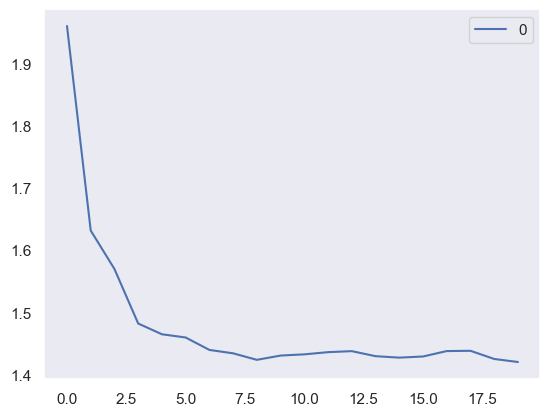

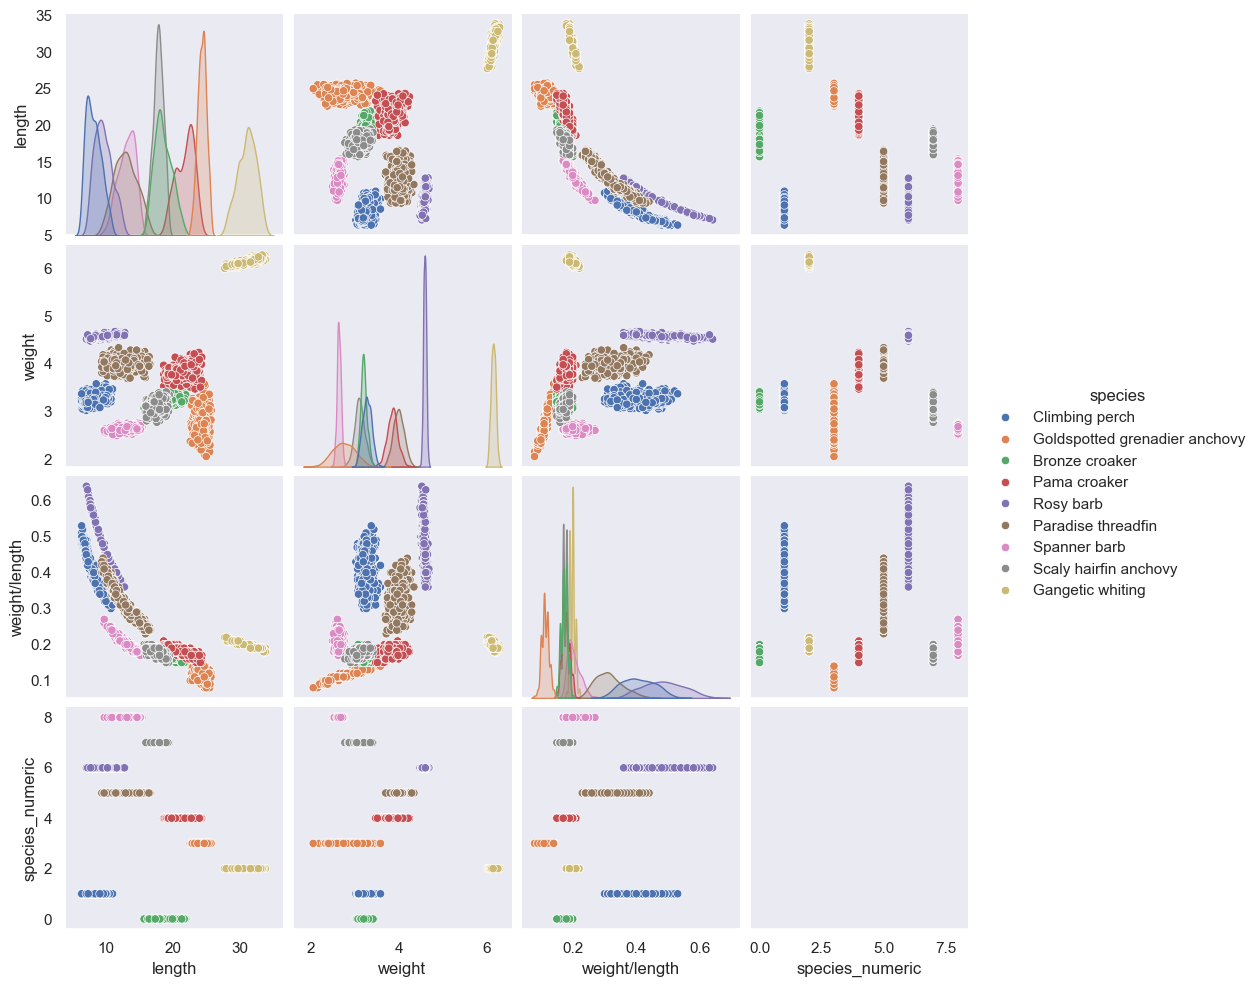

In [136]:
# Pairplot to visualize feature relationships
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()


# Clustering (K-Means)

#### Wie viele Gruppen denkst du, dass es in deinen Daten gibt? Probiere diesen Wert als ersten Startwert für K.
9, da es 9 verschiedene Speziesen gibt.
#### Visualisiere die Gruppen, die von K-Means identifiziert wurde anhand zweier Features
Inhertia visualization schlägt K = 2 vor, wobei ein wert von 9 gebraucht wird, da es 9 Speziesen sind.
K-Means ist nicht gut für diese Daten, da es auch überlappungen verschiedener Gruppen gibt

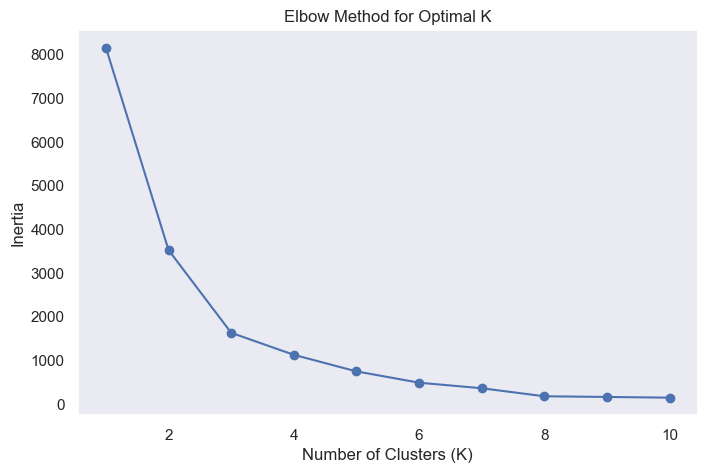

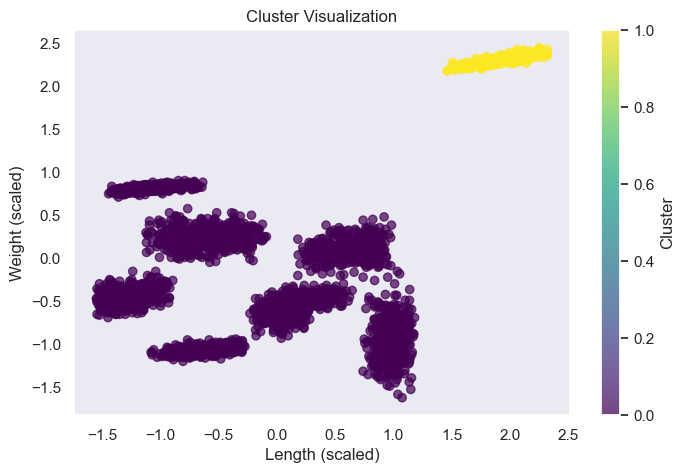

In [137]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Select numerical features
X = df[['length', 'weight']]

# Scale the data (K-Means is sensitive to feature scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters
inertia = [] # = wie nahe die Cluster beisammen sind
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia') # trägheit
plt.title('Elbow Method for Optimal K')
plt.show()

kmeans = KMeans(n_clusters=2, n_init="auto")
kmeans.fit(X_scaled)
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.xlabel('Length (scaled)')
plt.ylabel('Weight (scaled)')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()


Cluster Centers:
[[ 0.62758848  0.10079651]
 [-1.28966084 -0.45050832]
 [ 1.9277116   2.31030759]
 [ 0.11267311 -0.56834266]
 [-1.08826917  0.80629481]
 [ 0.97381477 -1.14538421]
 [-0.61216584  0.2371174 ]
 [-0.60187224 -1.0642534 ]
 [ 0.98836036 -0.75480097]]


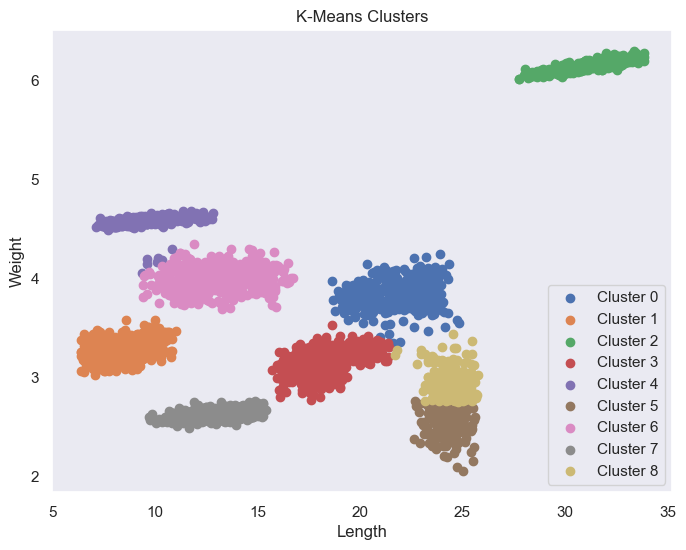

In [138]:
# Train K-Means with optimal K
kmeans = KMeans(n_clusters=9, random_state=42) # K value
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)
# 2D scatter plot of clusters
plt.figure(figsize=(8, 6))
for cluster in range(9):  # Adjust based on the number of clusters
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['length'], cluster_data['weight'], label=f'Cluster {cluster}')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('K-Means Clusters')
plt.legend()
plt.show()


# Neuronal Networks
## Multilayer Perceptron (MLP)
### Classification
* Scaly hairfin anchovy and Pama croaker overlap

Parameter:
* hidden_layer_size: Number of Neurons in the hidden layer (Default: (100,))
* activation: The activationfunction (Default: relu)
* solver: For weight optimization (Method to determine the weights for every neuron) (Default: adam)
* learning_rate: When weight updates should be scheduled (Default: constant)
Ofcourse

Score:
*Accuracy 0.94 is good, but the Scaly hairfin anchovy and the Pama croaker overlap (Same wheight and height)



In [139]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix

X = df[['length', 'weight']]
y = df['species']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 10), max_iter=500, activation='tanh', random_state=42) #loops 500 times

# Train the model
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)
# Calculation of probability
y_prob = mlp.predict_proba(X_test)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("probability of 100 test instances:")
print(np.round(y_prob[:5], 3)) # 3 comma digits

Confusion Matrix:
[[ 75   0   0   0   0   0   0  16   0]
 [  0 120   0   0   0   0   0   0   0]
 [  0   0  86   0   0   0   0   0   0]
 [  1   0   0  76   0   0   0   0   0]
 [  0   0   0   0  86   0   0   0   0]
 [  0   0   0   0   0 102   0   0   0]
 [  0   0   0   0   0   0  89   0   0]
 [ 42   0   0   0   0   0   0  58   0]
 [  0   0   0   0   0   0   0   0  65]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        91
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00        86
           3       1.00      0.99      0.99        77
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00        89
           7       0.78      0.58      0.67       100
           8       1.00      1.00      1.00        65

    accuracy                           0.93       816
   macro a

### Regression

In [140]:
from sklearn.metrics import mean_absolute_error

X = df[['length', 'weight']]
y = df['species_numeric']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_scale = scaler.transform(X_test)  

# Define the MLPClassifier
mlp = MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=1000, activation='relu', learning_rate='adaptive', random_state=42) #loops 200 times

# Train the model
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(x_scale)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse) # Difference between y_test and y_pred = better model performance
print("Mean Absolute Error:", mae) # average absolute difference between predictions and true values = better model performance
print("R² Score:", r2)

Mean Squared Error: 2.0136472512086128
Mean Absolute Error: 0.7153099938441886
R² Score: 0.691911333433189


## Vergleich von mind. drei verschiedenen ML Klassifikatoren/Regressoren anhand der Ergebnisse der Validierung mithilfe der Testdaten

### Linear-Regression:
* Accuracy (R2):  0.016172009438415236
MLP-Regression
* Accuracy (R2): 0.691911333433189
KNN-Regression:
* Accuracy (R2): 0.6229783869804264

The Regression is not pefekt for our Model, because we want to predict the Species (Class) of a Fish. 
The species is a categorical value, which means that the Classification works better.

R2 value:
* 80%-100%: strong correlation
* 50%-80%: Moderate correlation (Not perfect)
...


## Mindestens drei Erkenntnisse im ML Prozess, die euch überrascht haben bei eurer Arbeit

### 1. Regression in our Model
We want to predict the Species of a Fish, which means that the regressor does not work well, because it is used for numeric values.
### 2. Features in the Learning Process
The more features we use, the more accurate our model gets.
### 3. ?